In [217]:
import numpy as np
import networkx as nx

with open("../data/day12.txt", "r") as f:
    input = f.read()

data = [row.split("-") for row in input.split("\n")]
#data

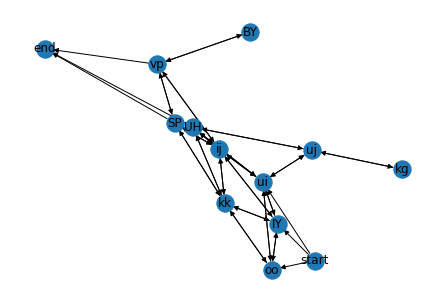

In [218]:
G = nx.DiGraph()
for edge in data:
    if 'start' in edge:
        node = [x for x in edge if x != 'start'][0]
        G.add_edge('start', node)
    elif 'end' in edge:
        node = [x for x in edge if x != 'end'][0]
        G.add_edge(node, 'end')
    else:
        G.add_edge(*edge)
        G.add_edge(*edge[::-1])

nx.draw(G, with_labels=True)

In [219]:
def add_paths(path_list, final_list, puzzle):
    new_list = []
    for path in path_list:
        current_node = path[-1]

        if current_node == "end":
            final_list.append(path)
        else:
            for node in G.neighbors(current_node):
                proposed_list = path + [node]
                lower_case_list = [x for x in proposed_list if x.islower()]
                if (len(lower_case_list) - len(set(lower_case_list))) < puzzle:
                    new_list.append(proposed_list)

    return new_list, final_list

In [220]:
# Puzzle 1

path_list = [["start"]]
final_list = []
for n in range(20):
    path_list, final_list = add_paths(path_list, final_list, 1)
len(final_list)

#nice_list = [",".join(row) for row in final_list]
#nice_list.sort()
#nice_list

4754

In [221]:
# Puzzle 2

path_list = [["start"]]
final_list = []
for n in range(20):
    path_list, final_list = add_paths(path_list, final_list, 2)
print(len(final_list))

143562
